In [2]:
#importing libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#compression
import pickle
import bz2

In [3]:
#To reconstruct the 12 lead ecg from the array of datapoints
lead_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

def ecg_plot(array,labels):
    for i in range(1): #only plotting 1 ecg
        plt.rcParams["figure.figsize"] = [16,9]
        fig, axs = plt.subplots(len(lead_order))
        a=np.random.randint(len(array))
        print("Label Value:",labels[a])
        if array.shape[1:3] == (2500, 12):
            for i in range(0,12):
                axs[i].plot(array[a][:,i])
                axs[i].set(ylabel=str(lead_order[i]))
        elif array.shape[1:3] == (12, 2500):
            for i in range(0,12):
                axs[i].plot(array[a][i,:])
                axs[i].set(ylabel=str(lead_order[i]))
        elif array.shape[1:] == (1,2500,12):
            for i in range(0,12):
                axs[i].plot(array[a][0][:,i])
                axs[i].set(ylabel=str(lead_order[i]))
        else:
            print("ECG shape not valid: ",array.shape)

In [4]:
#Loading data from compressed file

in_file = bz2.BZ2File("/Users/lukelorenz/Desktop/ECGNN/data/sim_ecg_data.bz2",'rb')
data = pickle.load(in_file)
in_file.close()

In [5]:
#Loading labels from compressed file

in_file = bz2.BZ2File("/Users/lukelorenz/Desktop/ECGNN/data/sim_ecg_labels.bz2",'rb')
labels = pickle.load(in_file)
in_file.close()

Label Value: 1


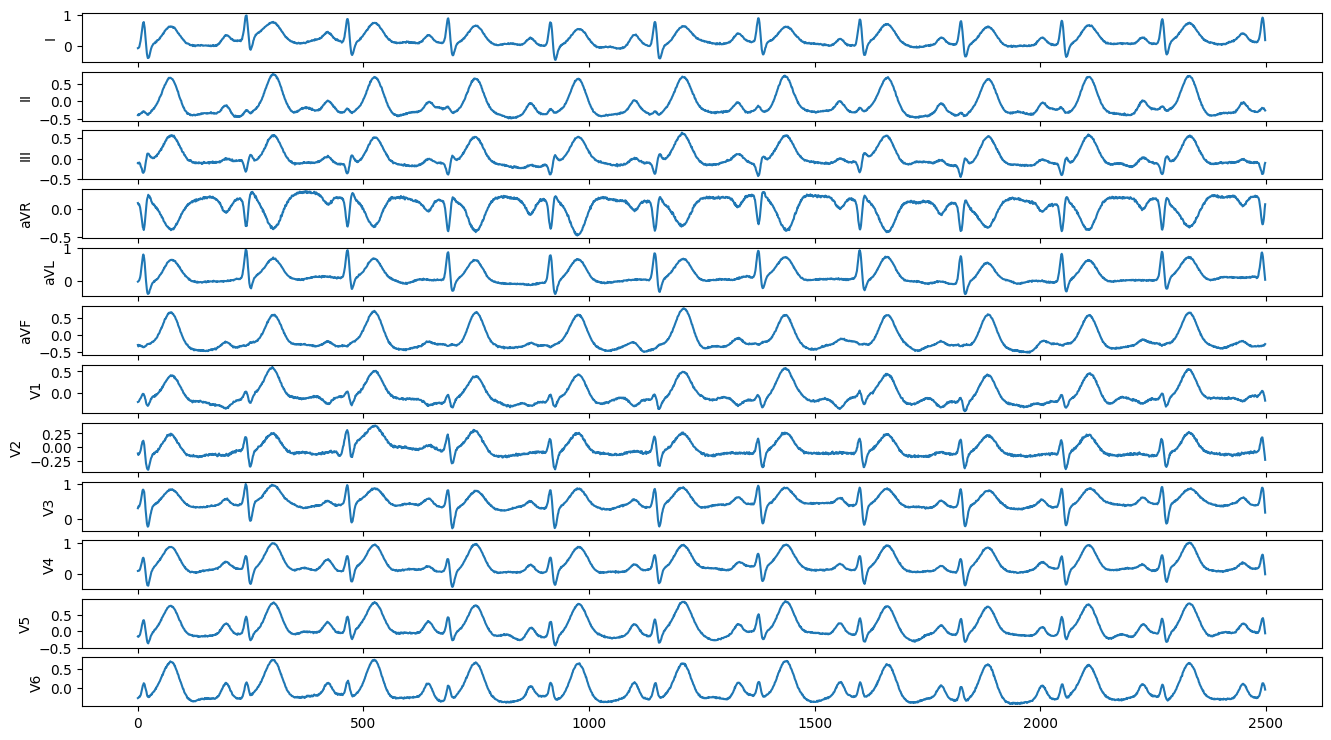

In [6]:
ecg_plot(data,labels)

In [7]:
data.shape # number of training examples, number of leads, number of datapoints

(2000, 12, 2500)

In [8]:
data[0]

array([[ 0.04818659,  0.03817569,  0.0467304 , ...,  0.82273265,
         0.79891122,  0.67787463],
       [-0.26261611, -0.27138664, -0.25957992, ..., -0.23781761,
        -0.23954033, -0.23899665],
       [-0.00188141, -0.014615  ,  0.00564455, ..., -0.3621341 ,
        -0.36181991, -0.29293989],
       ...,
       [ 0.03286304,  0.04721005,  0.05742882, ...,  0.59043243,
         0.55725798,  0.48223806],
       [-0.07432569, -0.06268654, -0.08309892, ...,  0.41664579,
         0.37263862,  0.32575059],
       [-0.20322749, -0.20176646, -0.1926914 , ...,  0.11707518,
         0.1173477 ,  0.04408343]])

In [9]:
reshaped = np.transpose(data, axes=[0, 2, 1]) #switching data

In [10]:
reshaped.shape

(2000, 2500, 12)

In [11]:
modified = []
for i,ecg in enumerate(reshaped):
    if labels[i]==1:
        modified.append(ecg*10)
    else:D+D
        modified.append(ecg)
modified = np.array(modified)

IndentationError: unexpected indent (4108698022.py, line 6)

In [ ]:
modified.shape